In [ ]:
# Install required libraries (if not installed already)
!pip install tensorflow opencv-python matplotlib scikit-learn --quiet

In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [7]:
DATA_DIR = 'gui/static/uploads/'
IMG_SIZE = 128


In [8]:
data = []
labels = []

for img_name in os.listdir(DATA_DIR):
    try:
        path = os.path.join(DATA_DIR, img_name)
        age, gender, hair = img_name.split('_')
        hair = hair.split('.')[0]
        age = int(age)

        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # Normalize

        # Logic override for age 20–30
        if 20 <= age <= 30:
            final_gender = 'female' if hair == 'long' else 'male'
        else:
            final_gender = gender

        data.append(img)
        labels.append(final_gender)

    except Exception as e:
        print(f"Skipping {img_name} due to error: {e}")

X = np.array(data)
y = np.array(labels)

print("Data loaded:", X.shape)


Skipping 20_female.long.jpg due to error: not enough values to unpack (expected 3, got 2)
Skipping 22_female.long.jpg due to error: not enough values to unpack (expected 3, got 2)
Skipping 23_female_short.jpg due to error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Skipping 25_female_short.jpg due to error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Skipping 27_male_long.jpg due to error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Skipping nm0000100_rm862094592_1955-1-6_2011.jpg due to error: too many values to unpack (expected 3)
Skipping style.css due to error: not enough values to unpack (expected 3, got 1)
Data loaded: (8, 12

In [9]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # male=1, female=0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\shubham sharma\Desktop\Long_Hair_Gender_Detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=8)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 0.6372 - val_accuracy: 0.5000 - val_loss: 8.8301
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8333 - loss: 2.2117 - val_accuracy: 0.5000 - val_loss: 7.0473
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8333 - loss: 1.1275 - val_accuracy: 0.5000 - val_loss: 3.5606
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8333 - loss: 0.1342 - val_accuracy: 0.5000 - val_loss: 1.3081
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 1.0000 - loss: 0.1276 - val_accuracy: 0.5000 - val_loss: 0.6275
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.8333 - loss: 0.3574 - val_accuracy: 0.5000 - val_loss: 0.7875
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 1.0000 - loss: 0.2467 - val_accuracy: 0.5000 - val_loss: 2.0858
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 1.0000 - loss: 0.0636 - val_accuracy: 0.5000 - val_loss: 3.

In [16]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 4.4348
Test Accuracy: 50.00%


In [18]:
model.save('../model/gender_model.h5')
print("Model saved as gender_model.h5")

Model saved as gender_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


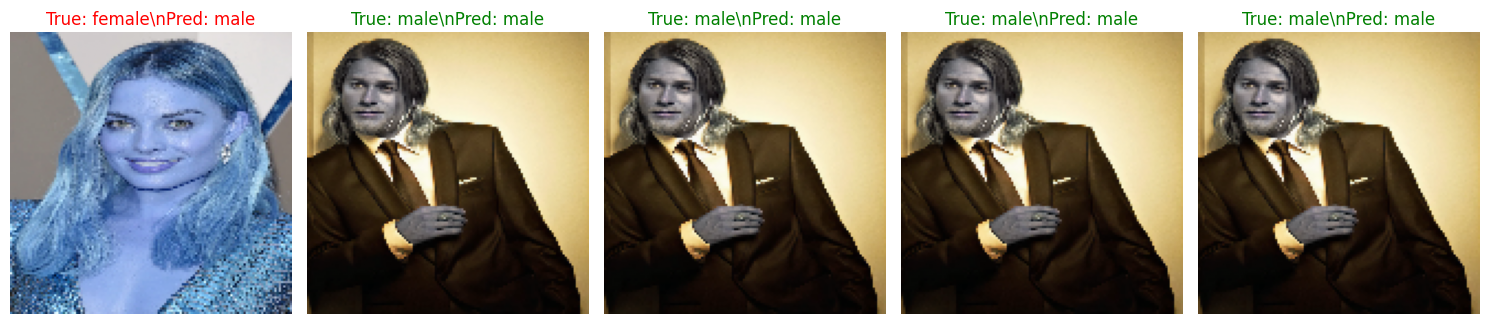

In [19]:
def show_random_predictions(n=5):
    indices = np.random.choice(len(X_test), n)
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        img = X_test[idx]
        true_label = le.inverse_transform([y_test[idx]])[0]
        pred = model.predict(np.expand_dims(img, axis=0))[0][0]
        pred_label = le.inverse_transform([int(pred >= 0.5)])[0]
        color = 'green' if true_label == pred_label else 'red'

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\\nPred: {pred_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_predictions()